In [1]:
%matplotlib inline

## Styles

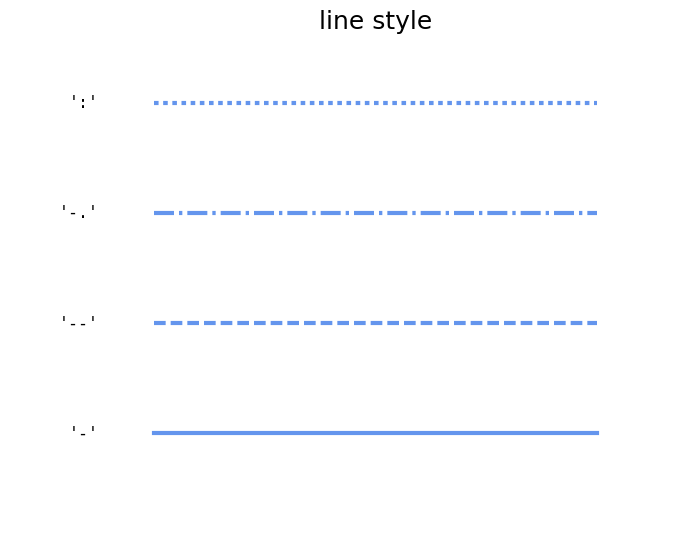

In [2]:
"""
Reference for line-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt

color = 'cornflowerblue'
points = np.ones(5)    # Draw 5 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

# Plot all line styles.
f, ax = plt.subplots()

linestyles = ['-', '--', '-.', ':']
for y, linestyle in enumerate(linestyles):
    ax.text(-0.5,y,nice_repr(linestyle), **text_style)
    #ax.text(-0.5,y,linestyle, **text_style)
    ax.plot(y*points, linestyle=linestyle, color=color, linewidth=3)
    format_axes(ax)
    ax.set_title('line style')

plt.show()

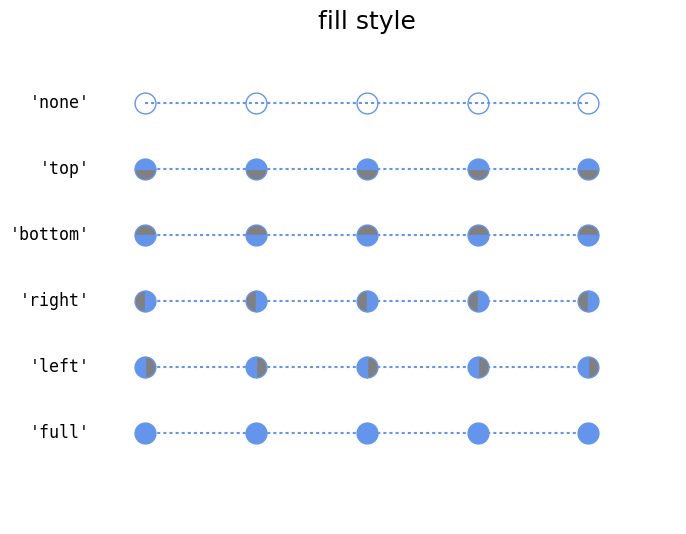

In [3]:
"""
Reference for marker fill-styles included with Matplotlib.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(5)   # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(color='cornflowerblue', linestyle=':', marker='o',
                   markersize=15, markerfacecoloralt='gray')

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

fig, ax = plt.subplots()

# Plot all fill styles.
for y, fill_style in enumerate(Line2D.fillStyles):
    #print y,y*points
    ax.text(-0.5, y, nice_repr(fill_style), **text_style)
    ax.plot(y*points, fillstyle=fill_style, **marker_style)
    format_axes(ax)
    ax.set_title('fill style')
    
plt.show()

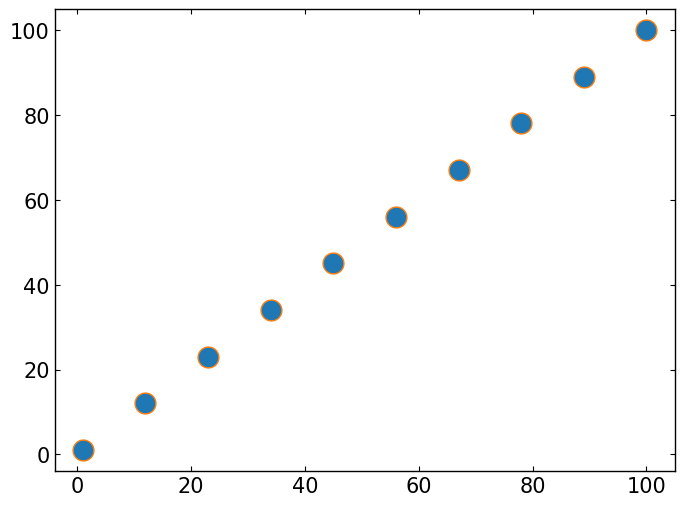

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,100,10)
y = x

fig,ax = plt.subplots()

ax.plot(x,y,'o',markersize=15,fillstyle='full',zorder=0,markeredgecolor='C1')


In [27]:
?ax.errorbar

<Container object of 3 artists>

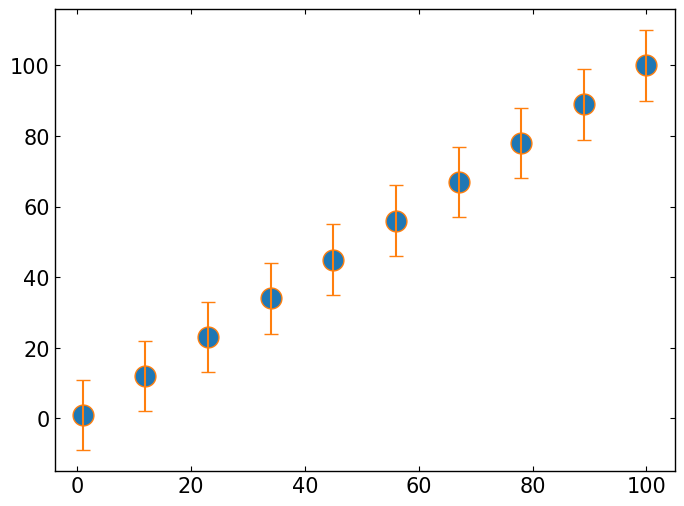

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,100,10)
y = x

fig,ax = plt.subplots()

ax.errorbar(x,y,yerr=10,fmt='o',markersize=15,fillstyle='full',markeredgecolor='C1' \
            ,ecolor='C1',capsize=5,barsabove=True)

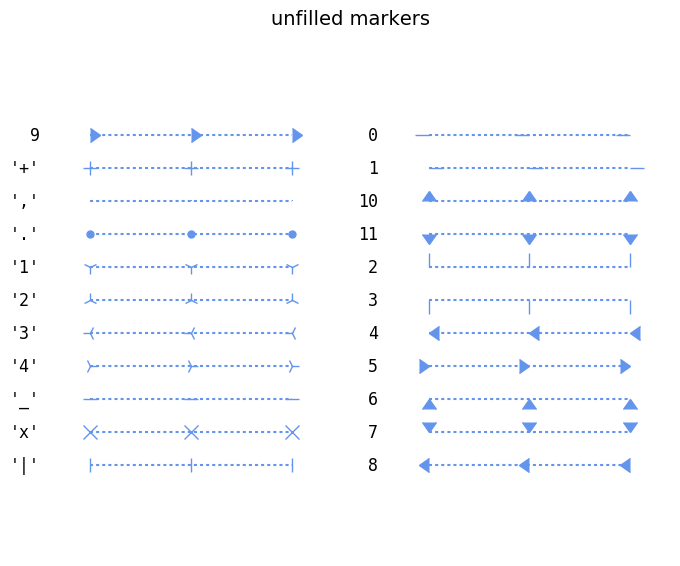

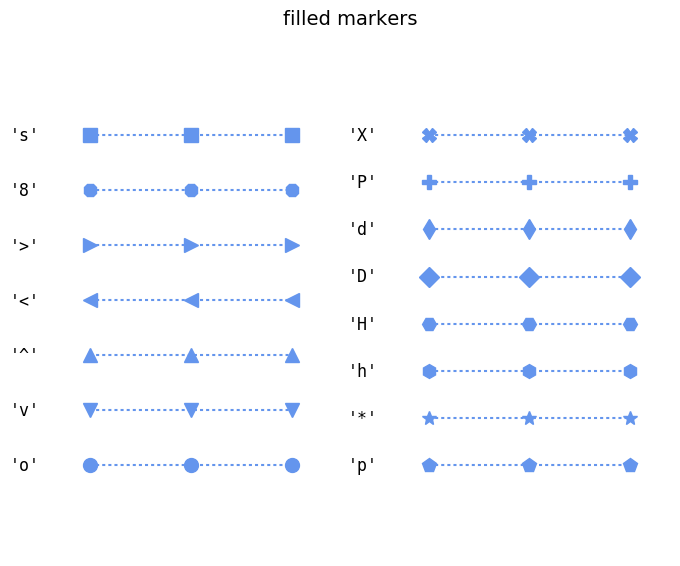

In [4]:
"""
Reference for filled- and unfilled-marker types included with Matplotlib.
"""

from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(3)    # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                 fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)

def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    
def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])

# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3

unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                   if func != 'nothing' and m not in Line2D.filled_markers]

# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.

unfilled_markers = sorted(unfilled_markers, 
                         key=lambda x: (str(type(x)), str(x)))[::-1]

for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('unfilled markers', fontsize=14)


# Plot all filled markers.
# ------------------------

fig, axes = plt.subplots(ncols=2)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y*points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('filled markers', fontsize=14)

plt.show()

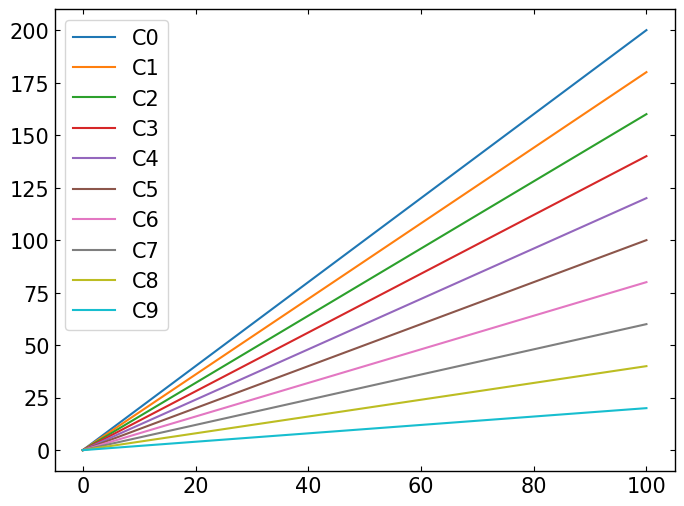

In [5]:
""" Reference of Colors """

import numpy as np
import matplotlib.pyplot as plt

x  = np.linspace(0,100,100)
y0,y1,y2,y3,y4,y5,y6,y7,y8,y9 = 2*x,1.8*x,1.6*x,1.4*x,1.2*x,x,0.8*x,0.6*x,0.4*x,0.2*x

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111)

ax.plot(x,y0,label='C0')
ax.plot(x,y1,label='C1')
ax.plot(x,y2,label='C2')
ax.plot(x,y3,label='C3')
ax.plot(x,y4,label='C4')
ax.plot(x,y5,label='C5')
ax.plot(x,y6,label='C6')
ax.plot(x,y7,label='C7')
ax.plot(x,y8,label='C8')
ax.plot(x,y9,label='C9')

ax.legend(loc='best')

### Draw the 2D image in polar coordinate

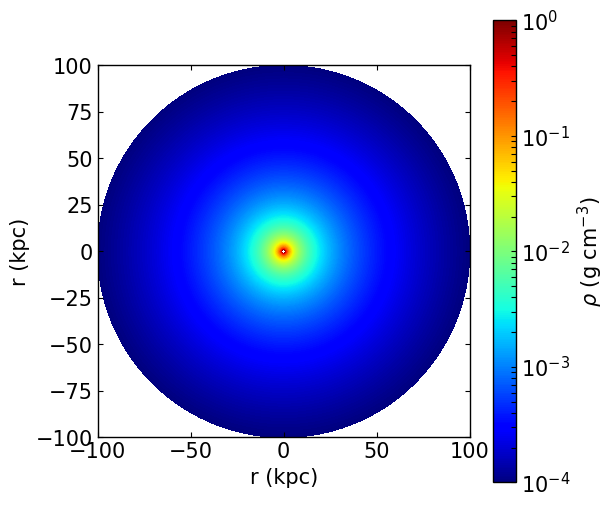

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')    # axisbg is not working for version >2.0 of matplotlib
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
clb = fig.colorbar(p,ax=ax1,label=r'$\rho$ (g cm$^{-3}$)')
#plt.locator_params(nbins=2)

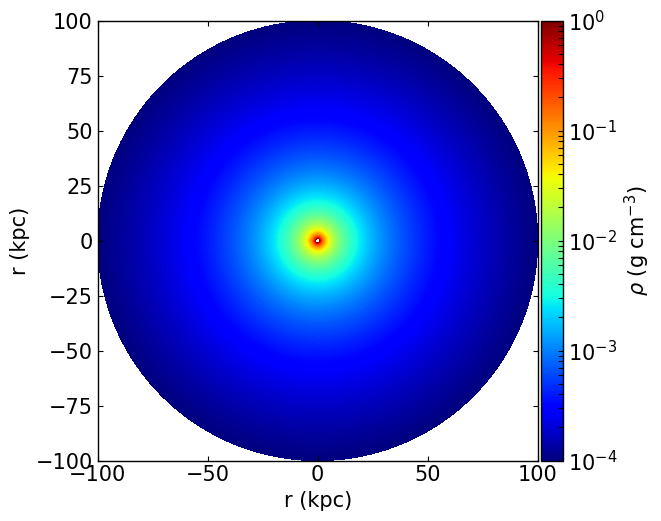

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.03)
# colorbar
clb = fig.colorbar(p,ax=ax1,cax=cax1,label=r'$\rho$ (g cm$^{-3}$)')

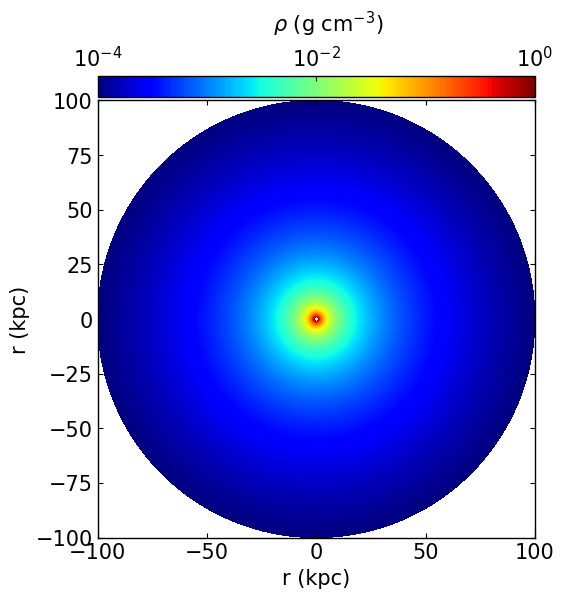

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable     # adjusted colorbar

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(6,6))
#ax1 = fig.add_subplot(111,axisbg='white')
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# colorbar
divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('top', size='5%', pad=0.03)
clb = fig.colorbar(p,ax=ax1,cax=cax1 \
                   ,orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.annotate(r'$\rho$ (g cm$^{-3}$)',(0.4,3.),xycoords='axes fraction')

# set the number of ticks
clb.locator = mpl.ticker.LogLocator(numticks=3)
# if the scale is not log, but normal, it should be
# clb.locator = mpl.ticker.MaxNLocator(nbins=3)
clb.update_ticks()

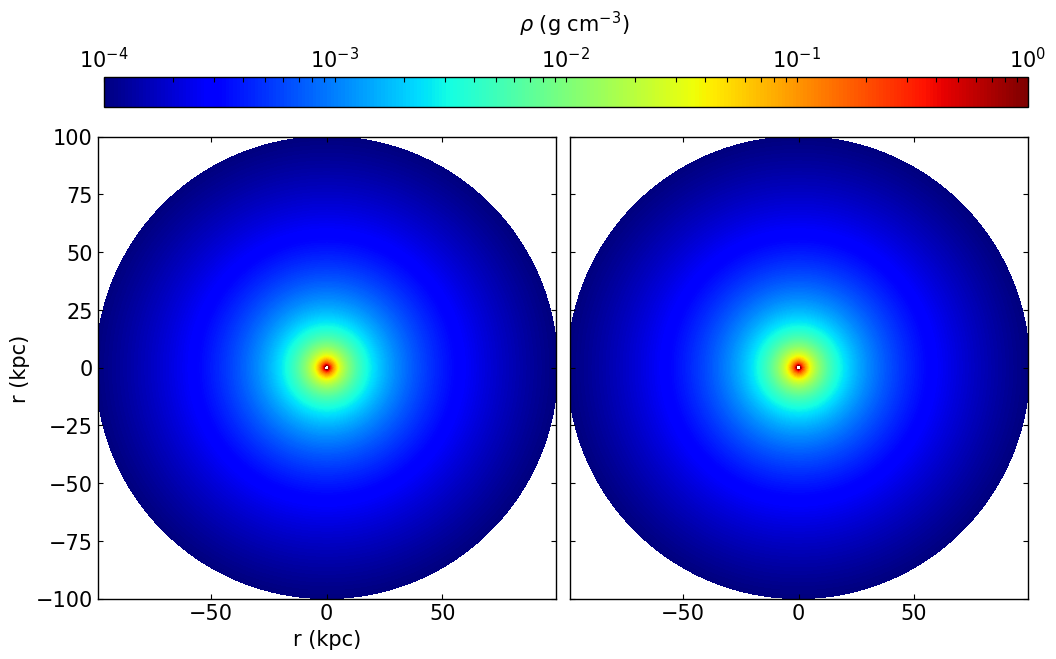

In [9]:
""" Shared axis & colorbar with multiple plots """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')
p = ax2.pcolormesh(x2d,y2d, d, norm=norm, cmap='jet')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

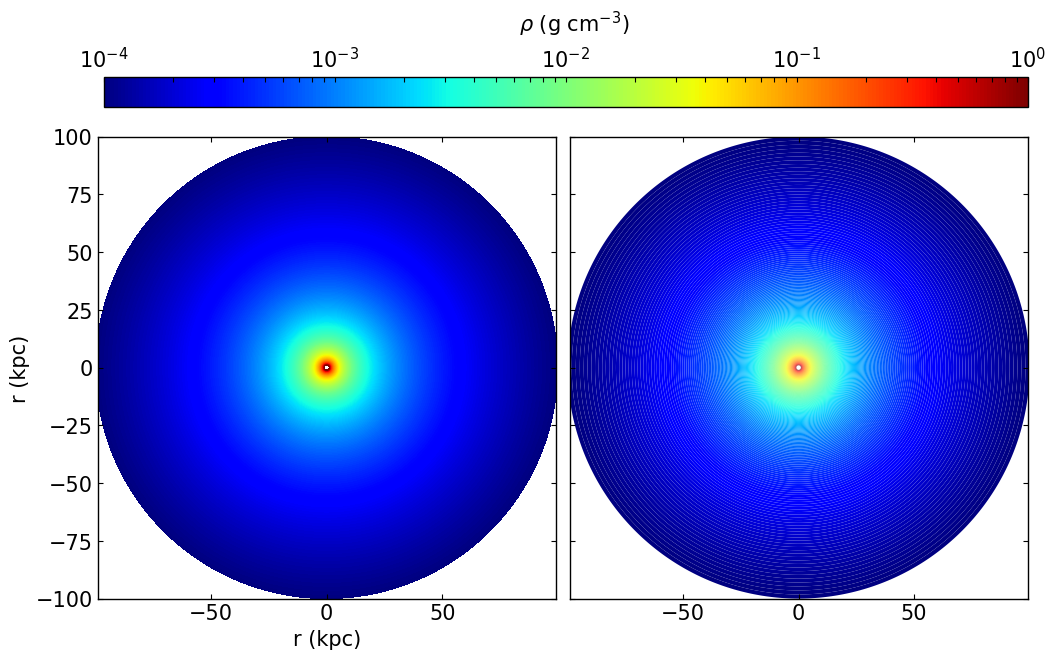

In [10]:
""" antialiased Problem (light borders between contour patches) """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

nlevs=256
vmax=d.max() ; vmin=d.min()
levs = np.power(10.,np.arange(nlevs)/float(nlevs-1)*(np.log10(vmax)-np.log10(vmin)) \
                            + np.log10(vmin))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.contourf(x2d,y2d, d, norm=norm, cmap='jet',antialiased=False, levels=levs)
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')

p = ax2.contourf(x2d,y2d, d, norm=norm, cmap='jet', antialiased=True, levels=levs)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

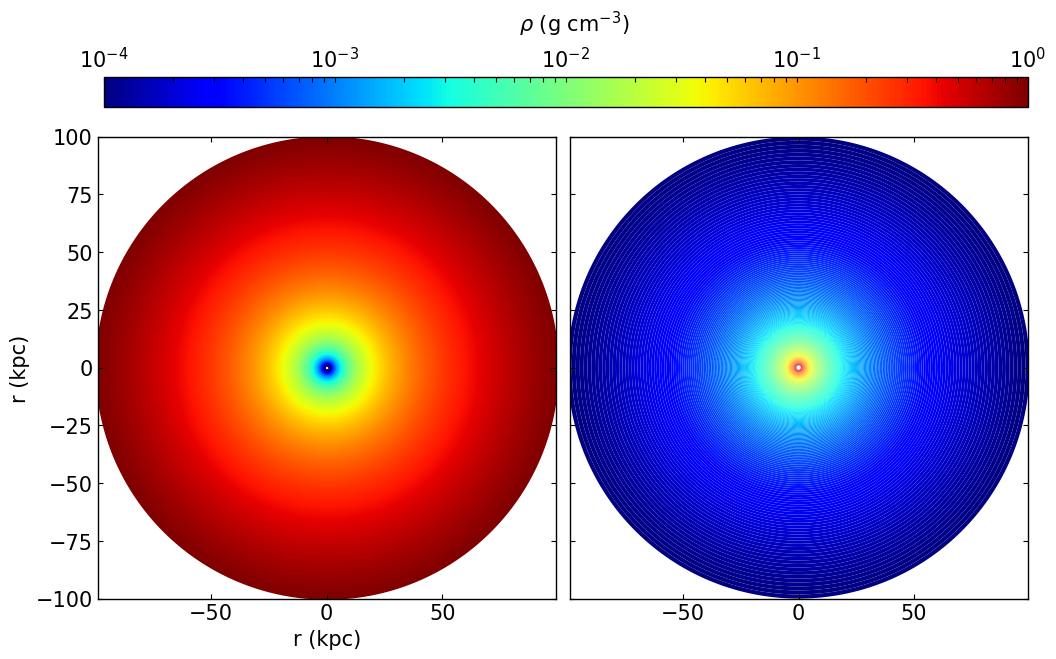

In [11]:
""" antialiased Problem (light borders between contour patches) II
    If we save the figure as postscript file (.eps), the light borders are still shown 
    even without antialised option.
    Solution -> edgecolor of the contour should be set to 'face' """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Nr, Nth = 500, 500
r = np.linspace(1.,100.,Nr)
th = np.linspace(0.,2.*np.pi,Nth)

d = np.zeros((Nr,Nth), dtype=float)
for i,ir in enumerate(r):
    d[i,:] = 1./ir**2.

r2d, th2d = np.meshgrid(r,th,indexing='ij')
x2d, y2d = r2d*np.sin(th2d), r2d*np.cos(th2d)

fig = plt.figure(figsize=(12,6))

nlevs=256
vmax=d.max() ; vmin=d.min()
levs = np.power(10.,np.arange(nlevs)/float(nlevs-1)*(np.log10(vmax)-np.log10(vmin)) \
                            + np.log10(vmin))

# first plot
#ax1 = fig.add_subplot(121,axisbg='white')
ax1 = fig.add_subplot(121)
ax1.set_aspect('equal')

# reverse of the color_map
norm = mpl.colors.LogNorm(vmin=d.min(),vmax=d.max())
p = ax1.contourf(x2d,y2d, d, norm=norm, cmap='jet_r',antialiased=False, levels=levs)
ax1.set_xlabel('r (kpc)')
ax1.set_ylabel('r (kpc)')

""" Important Part """
# To erase the antialiased line between counter patches
for c in p.collections:
    c.set_edgecolor("face")


# second plot
#ax2 = fig.add_subplot(122,axisbg='white',sharey=ax1)
ax2 = fig.add_subplot(122,sharey=ax1)
ax2.set_aspect('equal')

p = ax2.contourf(x2d,y2d, d, norm=norm, cmap='jet', antialiased=True, levels=levs)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=0.03)


# colorbar

# axis for color bar
ax3 = fig.add_axes([0.13,0.93,0.77,0.05])   #[x,y, x-width, y-width]

norm = mpl.colors.LogNorm(vmin=d.min(), vmax=d.max())
clb = mpl.colorbar.ColorbarBase(ax3,orientation='horizontal' \
                               ,norm=norm,cmap='jet')
ax3.xaxis.set_ticks_position("top")
ax3.annotate(r'$\rho$ (g cm$^{-3}$)',(0.45,2.5),xycoords='axes fraction')

fig.savefig('../figures/test.eps')

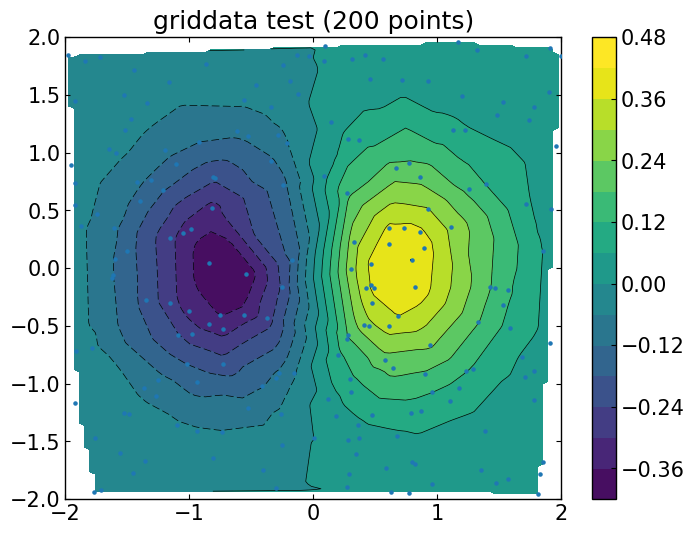

In [12]:
""" Contour non-uniform grid data """

from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
seed(0)
npts = 200
x = uniform(-2, 2, npts)
y = uniform(-2, 2, npts)
z = x*np.exp(-x**2 - y**2)
# define grid.
xi = np.linspace(-2.1, 2.1, 100)
yi = np.linspace(-2.1, 2.1, 200)
# grid the data.
zi = griddata(x, y, z, xi, yi, interp='linear')
# contour the gridded data, plotting dots at the nonuniform data points.
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
CS = plt.contourf(xi, yi, zi, 15,
                  vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # draw colorbar
# plot data points.
plt.scatter(x, y, marker='o', s=5, zorder=10)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('griddata test (%d points)' % npts)
plt.show()

## Draw vertical & horizontal lines in the figure

* Note that the position in axhline or axvline indicate the relative one for the window size.
--> e.g.) xmin, xmax indicates the relative position for the window size

* To draw the vertical/horizontal lines with the portion of the window with data coordinate, it should be
--> plt.plot((x1,x2),(y1,y2))

[-1, 2, -1, 2]

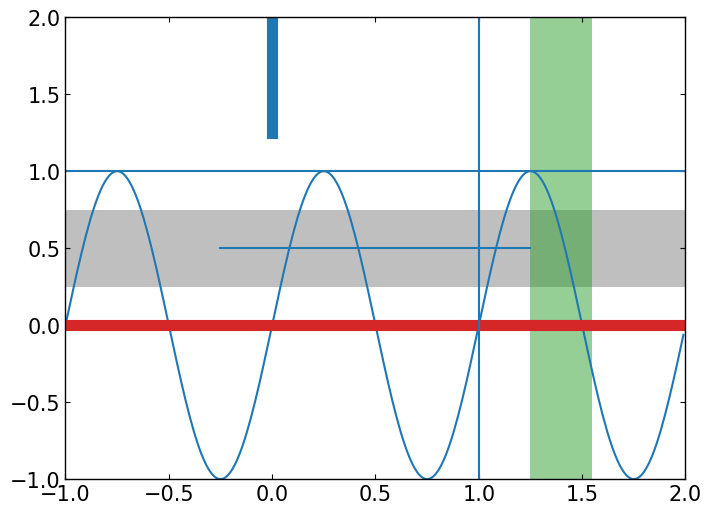

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])

### shared x & y label on multiple plots; managing multiple plots manually

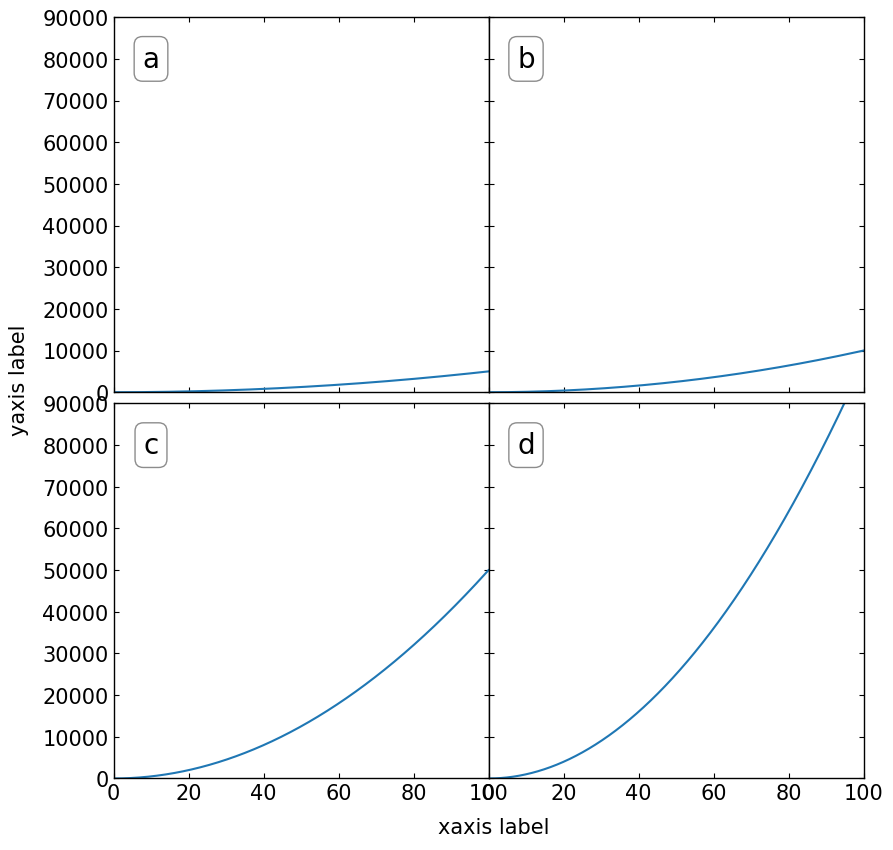

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

xlim = [0,100]
ylim = [0,90000]

x = np.linspace(0,100,5000)
y1 = x**2/2.
y2 = x**2
y3 = x**2*5
y4 = x**2*10

# subplots configuration  (position should be converted to normal scale)
pltx0=[30.,10.]; plty0=[20.,10.]   # margin left & right
pltxw=0.; pltyw=3.                # x(horizontal), y(vertical) gap
pltxs=100.; pltys=100.             # plot size
winxs=np.sum(pltx0)+2*pltxs+pltxw; winys=np.sum(plty0)+2*pltys+pltyw

fig = plt.figure(figsize=(9,9*winys/winxs))

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

# first plot
ax1  = fig.add_subplot(221)
ax1.plot(x,y1)
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])
ax1.text(10, 80000, "a", ha="center", va="center", size=20,
        bbox=bbox_props)
plt.setp(ax1.get_xticklabels(), visible=False)

# second plot
ax2  = fig.add_subplot(222, sharey=ax1)
ax2.plot(x,y2)
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ylim[0], ylim[1])
ax2.text(10, 80000, "b", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
#plt.subplots_adjust(wspace=pltxw/pltxs)

# third plot
ax3  = fig.add_subplot(223, sharex=ax1)
ax3.plot(x,y3)
ax3.set_xlim(xlim[0], xlim[1])
ax3.set_ylim(ylim[0], ylim[1])
ax3.text(10, 80000, "c", ha="center", va="center", size=20,
        bbox=bbox_props)

#plt.subplots_adjust(hspace=pltyw/pltys)

# forth plot
ax4  = fig.add_subplot(224, sharex=ax2, sharey=ax3)
ax4.plot(x,y4)
ax4.set_xlim(xlim[0], xlim[1])
ax4.set_ylim(ylim[0], ylim[1])
ax4.text(10, 80000, "d", ha="center", va="center", size=20,
        bbox=bbox_props)

plt.setp(ax4.get_yticklabels(), visible=False)
#plt.subplots_adjust(hspace=pltyw/pltys, wspace=pltxw/pltxs)

# set the figure label
plt.annotate('yaxis label',(0.01,0.6),xycoords='figure fraction',rotation='vertical')
plt.annotate('xaxis label',(0.49,0.02),xycoords='figure fraction')

# adjust margin
fig.subplots_adjust(left=pltx0[0]/winxs,right=1-pltx0[1]/winxs,bottom=plty0[0]/winys,top=1-plty0[1]/winys \
                   ,hspace=pltyw/pltys, wspace=pltxw/pltxs)

# save the figure

#fig.savefig('test.eps')

### Set the drawing order

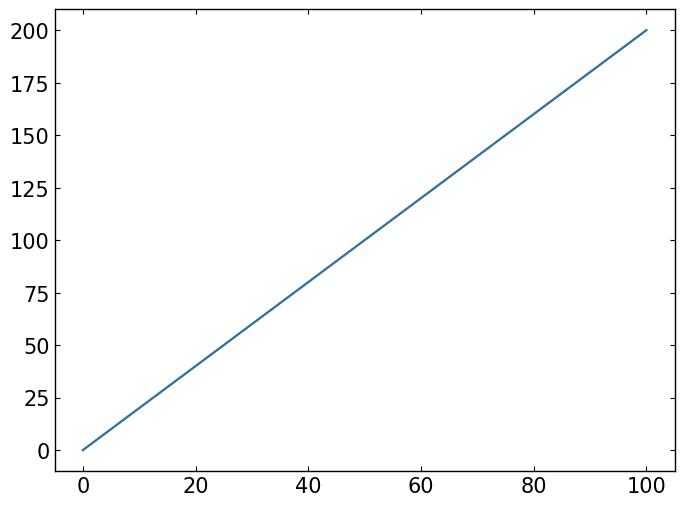

In [15]:
""" Drawing order (zorder)"""

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0.,100.,100)
y1 = x*2.
y2 = x*2.


fig = plt.figure()
ax  = fig.add_subplot(111)


line1, = ax.plot(x,y1,color='C0',zorder=2)
line2, = ax.plot(x,y2,color='C1',zorder=1)

#line1, line2 = ax.plot(x,y1,x,y2)

line2
line1

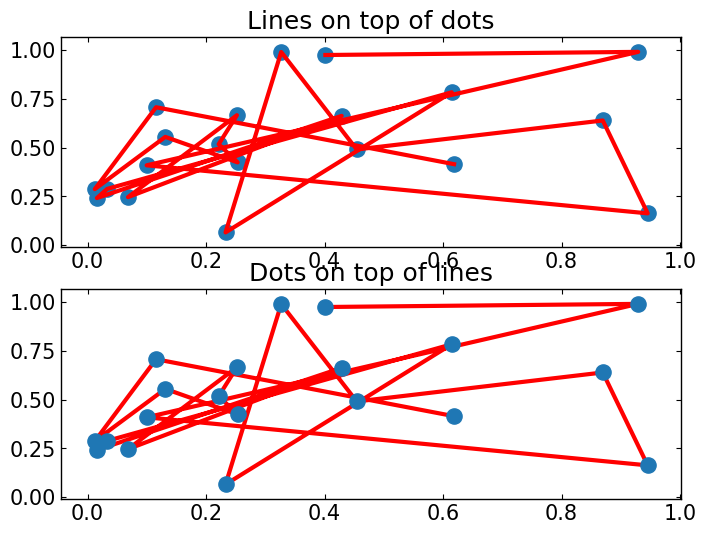

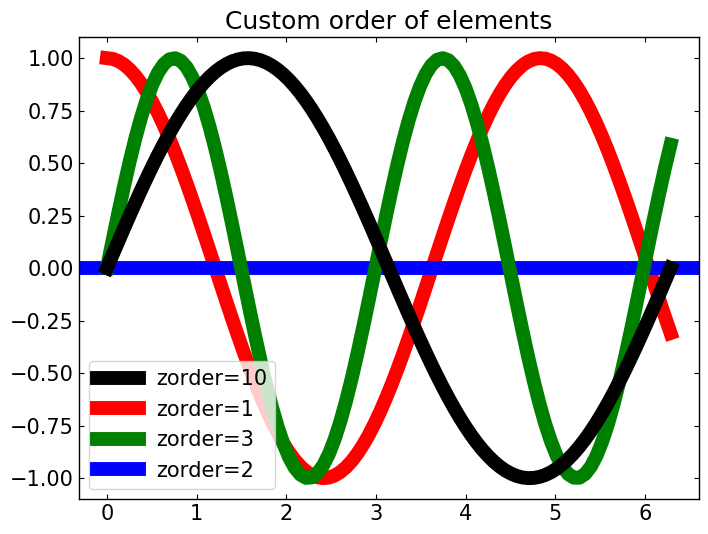

In [16]:
"""
The default drawing order for axes is patches, lines, text.  This
order is determined by the zorder attribute.  The following defaults
are set

Artist                      Z-order
Patch / PatchCollection      1
Line2D / LineCollection      2
Text                         3

You can change the order for individual artists by setting the zorder.  Any
individual plot() call can set a value for the zorder of that particular item.

In the fist subplot below, the lines are drawn above the patch
collection from the scatter, which is the default.

In the subplot below, the order is reversed.

The second figure shows how to control the zorder of individual lines.
"""

import matplotlib.pyplot as plt
import numpy as np

x = np.random.random(20)
y = np.random.random(20)

# Lines on top of scatter
plt.figure()
plt.subplot(211)
plt.plot(x, y, 'r', lw=3)
plt.scatter(x, y, s=120)
plt.title('Lines on top of dots')

# Scatter plot on top of lines
plt.subplot(212)
plt.plot(x, y, 'r', zorder=1, lw=3)
plt.scatter(x, y, s=120, zorder=2)
plt.title('Dots on top of lines')

# A new figure, with individually ordered items
x = np.linspace(0, 2*np.pi, 100)
plt.figure()
plt.plot(x, np.sin(x), linewidth=10, color='black', label='zorder=10', zorder=10)  # on top
plt.plot(x, np.cos(1.3*x), linewidth=10, color='red', label='zorder=1', zorder=1)  # bottom
plt.plot(x, np.sin(2.1*x), linewidth=10, color='green', label='zorder=3', zorder=3)
plt.axhline(0, linewidth=10, color='blue', label='zorder=2', zorder=2)
plt.title('Custom order of elements')
l = plt.legend()
l.set_zorder(20)  # put the legend on top
plt.show()

## Histogram

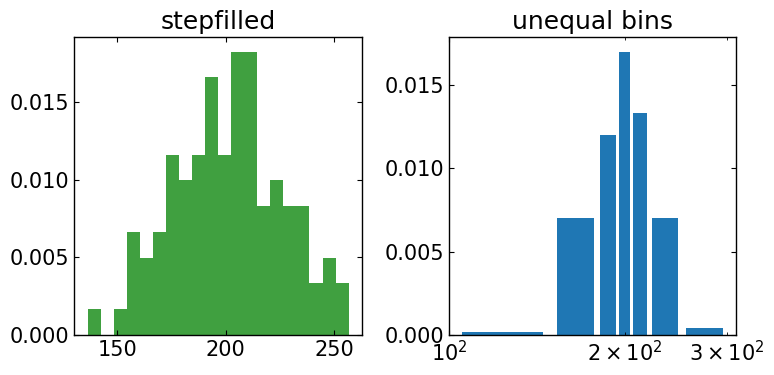

In [31]:
"""
================================================================
Demo of the histogram function's different ``histtype`` settings
================================================================

* Histogram with step curve that has a color fill.
* Histogram with custom and unequal bin widths.

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')
plt.xscale('log')

fig.tight_layout()
plt.show()

## Dual axes

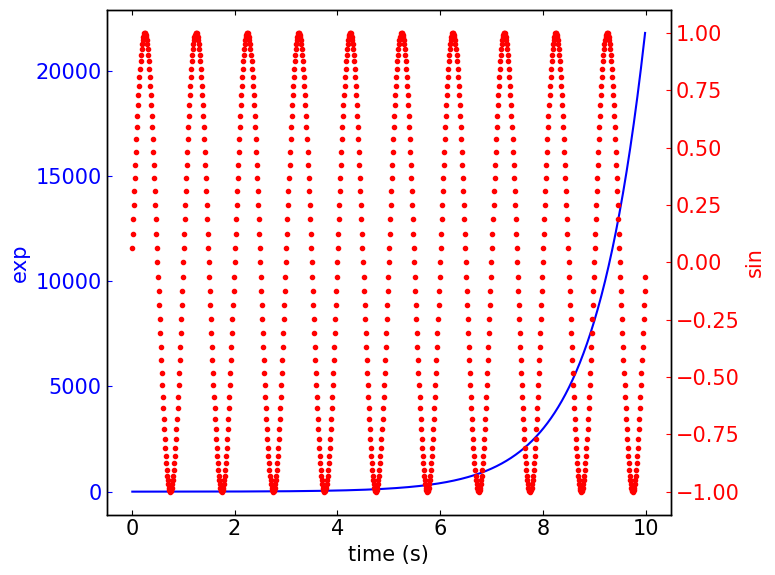

In [32]:
"""
===========================
Plots with different scales
===========================

Demonstrate how to do two plots on the same axes with different left and
right scales.

The trick is to use *two different axes* that share the same *x* axis.
You can use separate `matplotlib.ticker` formatters and locators as
desired since the two axes are independent.

Such axes are generated by calling the `Axes.twinx` method.  Likewise,
`Axes.twiny` is available to generate axes that share a *y* axis but
have different top and bottom scales.

The twinx and twiny methods are also exposed as pyplot functions.

"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()
t = np.arange(0.01, 10.0, 0.01)
s1 = np.exp(t)
ax1.plot(t, s1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('exp', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'r.')
ax2.set_ylabel('sin', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

# Arrows

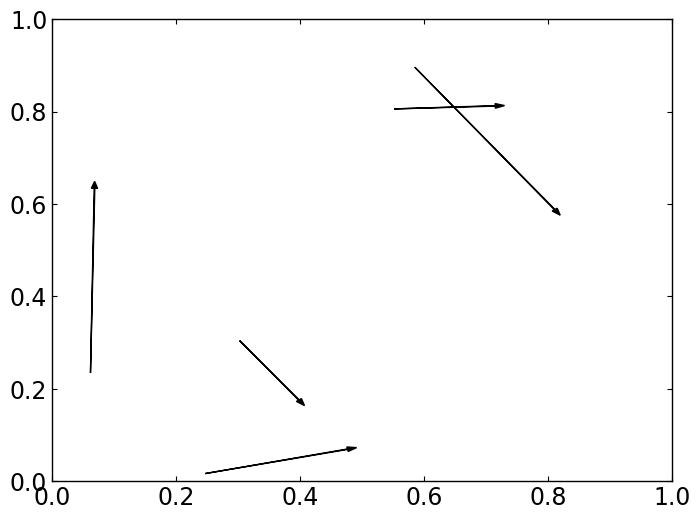

In [27]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

DATA = np.random.rand(5,5)

for idx in range(0,len(DATA[:,1])):
    colorVal = scalarMap.to_rgba(DATA[idx,4])
    plt.arrow(DATA[idx,0],  #x1
              DATA[idx,1],  # y1
              DATA[idx,2]-DATA[idx,0], # x2 - x1
              DATA[idx,3]-DATA[idx,1], # y2 - y1
              head_width=0.01,facecolor='k')

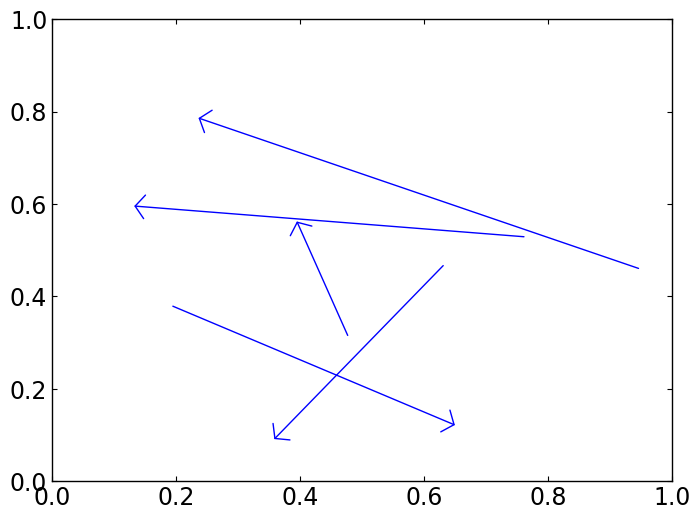

In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

DATA = np.random.rand(5,5)

for idx in range(0,len(DATA[:,1])):
    colorVal = scalarMap.to_rgba(DATA[idx,4])
    plt.annotate("", [DATA[idx,0], DATA[idx,1]],  
              [DATA[idx,2], DATA[idx,3]],
              arrowprops=dict(arrowstyle='->,head_width=0.5',edgecolor='blue'))

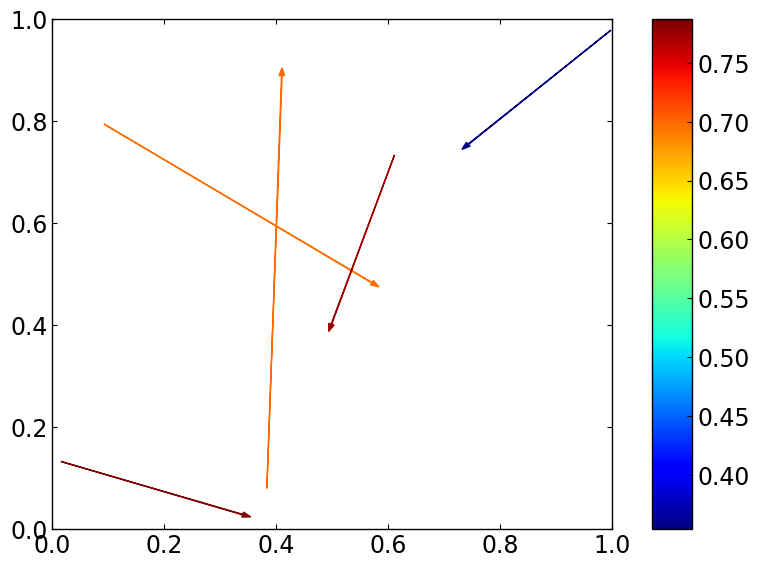

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl

DATA = np.random.rand(5,5)

cmap = plt.cm.jet

cNorm  = colors.Normalize(vmin=np.min(DATA[:,4]), vmax=np.max(DATA[:,4]))

scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

fig = plt.figure()
ax  = fig.add_axes([0.1, 0.1, 0.7, 0.85]) # [left, bottom, width, height]
axc = fig.add_axes([0.85, 0.10, 0.05, 0.85])

for idx in range(0,len(DATA[:,1])):
    colorVal = scalarMap.to_rgba(DATA[idx,4])
    ax.arrow(DATA[idx,0],  # x1
             DATA[idx,1],  # y1
             DATA[idx,2]-DATA[idx,0], # x2 - x1
             DATA[idx,3]-DATA[idx,1], # y2 - y1
             color=colorVal, head_width=0.01)

cb1 = mpl.colorbar.ColorbarBase(axc, cmap=cmap,
                                norm=cNorm,orientation='vertical')

plt.show() 

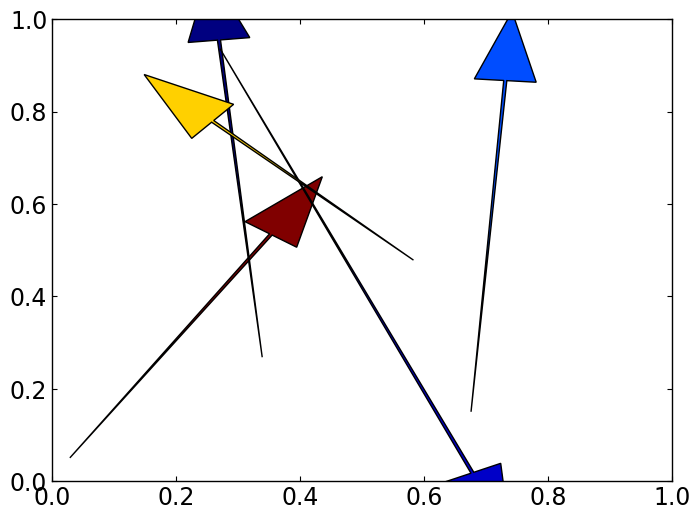

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline

DATA = np.random.rand(5,5)

cmap = plt.cm.jet

cNorm  = colors.Normalize(vmin=np.min(DATA[:,4]), vmax=np.max(DATA[:,4]))

scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)

for idx in range(0,len(DATA[:,1])):
    colorVal = scalarMap.to_rgba(DATA[idx,4])
    plt.arrow(DATA[idx,0],  #x1
              DATA[idx,1],  # y1
              DATA[idx,2]-DATA[idx,0], # x2 - x1
              DATA[idx,3]-DATA[idx,1], # y2 - y1
              facecolor=colorVal, edgecolor='k', width=0.005, head_width=0.1)

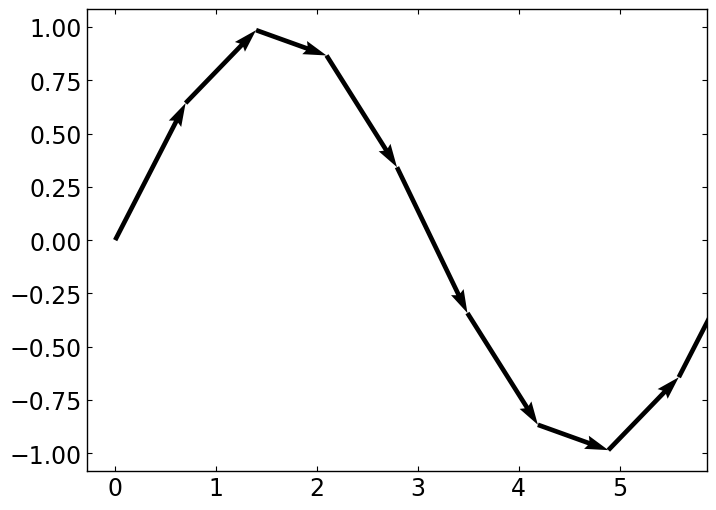

In [9]:
""" 2-D vectors by arrows """
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

plt.figure()
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)

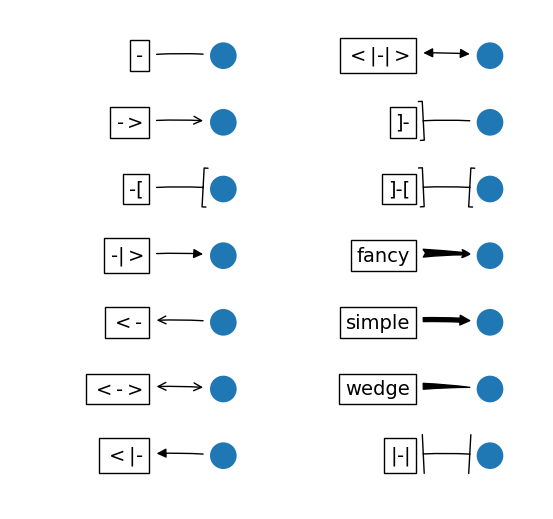

In [16]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig1 = plt.figure(1, (4 * ncol / 1.5, figheight / 1.5))
fontsize = 0.2 * 70


ax = fig1.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4 * ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s


for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i // nrow) * 4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)


In [38]:
?plt.annotate